https://www.kaggle.com/code/akhilreddysalibindla/capstone-project#Decision-Tree-Regression
https://www.kaggle.com/code/devraai/flight-price-prediction-analysis
https://www.kaggle.com/code/kifayatullahe/flight-price-prediction-98-accuracy
https://medium.com/@amit25173/linear-regression-vs-random-forest-7288522be3aa

In [58]:
import sys
!{sys.executable} -m pip install seaborn
!python -m pip install imbalanced-learn

'c:\Users\jimmy\Documents\Ta�i' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [60]:
flight_df = pd.read_csv("https://raw.githubusercontent.com/jimmytrn154/DataScienceFinalProject/refs/heads/main/Chuong_LogReg/finalSet.csv")

In [61]:
flight_df

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,1,1094000,False,125,27,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,1,1123000,False,275,27,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,1,888000,False,245,27,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,1,966000,False,220,27,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,2,948000,True,432,27,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CI 794,2967,1442,2,2973000,True,250,13,125.0
169,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CX 742,3112,1745,1,4053000,False,655,13,655.0
170,2025-05-14 16:45:32,2025-05-28,One way,Business Class,BR 398,3955,1260,1,4488000,False,195,13,195.0
171,2025-05-14 16:45:32,2025-05-28,One way,Business Class,OZ 730,3988,1235,1,3904000,False,90,13,90.0


In [62]:
flight_df["booking_date"].unique()

array(['2025-05-14 16:47:50', '2025-05-15 16:52:49',
       '2025-05-15 16:56:58', '2025-05-14 16:45:55',
       '2025-05-14 09:39:53', '2025-05-14 16:44:56',
       '2025-05-14 16:48:23', '2025-05-15 16:53:17',
       '2025-05-15 16:57:21', '2025-05-14 16:46:25',
       '2025-05-14 16:47:31', '2025-05-15 16:52:03',
       '2025-05-15 16:56:41', '2025-05-14 16:45:32'], dtype=object)

In [63]:
flight_df["travel_date"].unique()

array(['2025-06-11', '2025-05-14', '2025-06-25', '2025-05-28'],
      dtype=object)

# Data Cleaning

In [64]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_date            173 non-null    object 
 1   travel_date             173 non-null    object 
 2   route_type              173 non-null    object 
 3   travel_class            173 non-null    object 
 4   flight_number           173 non-null    object 
 5   price                   173 non-null    int64  
 6   total_duration          173 non-null    int64  
 7   n_stops                 173 non-null    int64  
 8   carbon_this             173 non-null    int64  
 9   delayed_any             173 non-null    bool   
 10  layover_total_duration  173 non-null    int64  
 11  days_to_departure       173 non-null    int64  
 12  avg_stop_duration       173 non-null    float64
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 16.5+ KB


In [65]:
flight_df.describe(include='all')

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
count,173,173,173,173,173,173.000000,173.000000,173.000000,1.730000e+02,173,173.000000,173.000000,173.000000
unique,14,4,1,2,19,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,2025-05-14 16:47:50,2025-06-11,One way,Economy,NH 898,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
freq,14,52,173,88,29,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2067.190751,1541.115607,1.202312,2.443347e+06,NaN,392.156069,22.606936,326.798651
std,NaN,NaN,NaN,NaN,NaN,1403.870055,322.829422,0.430785,1.490179e+06,NaN,315.458625,13.955759,256.487757
min,NaN,NaN,NaN,NaN,NaN,559.000000,1235.000000,1.000000,7.570000e+05,NaN,90.000000,-1.000000,90.000000
25%,NaN,NaN,NaN,NaN,NaN,680.000000,1345.000000,1.000000,9.760000e+05,NaN,205.000000,12.000000,195.000000
50%,NaN,NaN,NaN,NaN,NaN,2554.000000,1435.000000,1.000000,1.992000e+06,NaN,245.000000,26.000000,230.000000
75%,NaN,NaN,NaN,NaN,NaN,2992.000000,1705.000000,1.000000,3.864000e+06,NaN,630.000000,40.000000,352.500000


In [66]:
flight_df["days_to_departure"].value_counts()

days_to_departure
 27    28
 12    27
 13    25
 41    24
 26    24
 40    23
-1     22
Name: count, dtype: int64

In [67]:
#Change -1 day left to 0
flight_df['days_to_departure'] = flight_df['days_to_departure'].replace(-1, 0)
flight_df['days_to_departure'].value_counts()

days_to_departure
27    28
12    27
13    25
41    24
26    24
40    23
0     22
Name: count, dtype: int64

In [68]:
flight_df['delayed_any'] = flight_df['delayed_any'].replace({True: 1, False: 0})
flight_df['delayed_any']

C:\Users\jimmy\AppData\Local\Temp\ipykernel_148312\3220557818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flight_df['delayed_any'] = flight_df['delayed_any'].replace({True: 1, False: 0})


0      0
1      0
2      0
3      0
4      1
      ..
168    1
169    0
170    0
171    0
172    0
Name: delayed_any, Length: 173, dtype: int64

In [69]:
# Convert to datetime type
flight_df["travel_date"] = pd.to_datetime(flight_df["travel_date"])
flight_df["booking_date"] = pd.to_datetime(flight_df["booking_date"])

In [70]:
flight_df["n_stops"].value_counts()

n_stops
1    140
2     31
3      2
Name: count, dtype: int64

# Feature Engineering

In [71]:
cleaned_df = flight_df.copy()

In [72]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class']])
cleaned_df['class_encoded'] = encoder.fit_transform(cleaned_df[['travel_class']])

In [73]:
cleaned_df[["class_encoded", "travel_class"]]

,class_encoded,travel_class
0,0.0,Economy
1,0.0,Economy
2,0.0,Economy
3,0.0,Economy
4,0.0,Economy
...,...,...
168,1.0,Business Class
169,1.0,Business Class
170,1.0,Business Class
171,1.0,Business Class


In [74]:
# Dataset
X = cleaned_df.drop(columns=["travel_class", "class_encoded", "travel_date", "booking_date", "route_type", "flight_number"])
y = cleaned_df["class_encoded"]

c:\Users\jimmy\Documents\Tài liệu\vital docs\CODING\Python\dias\lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


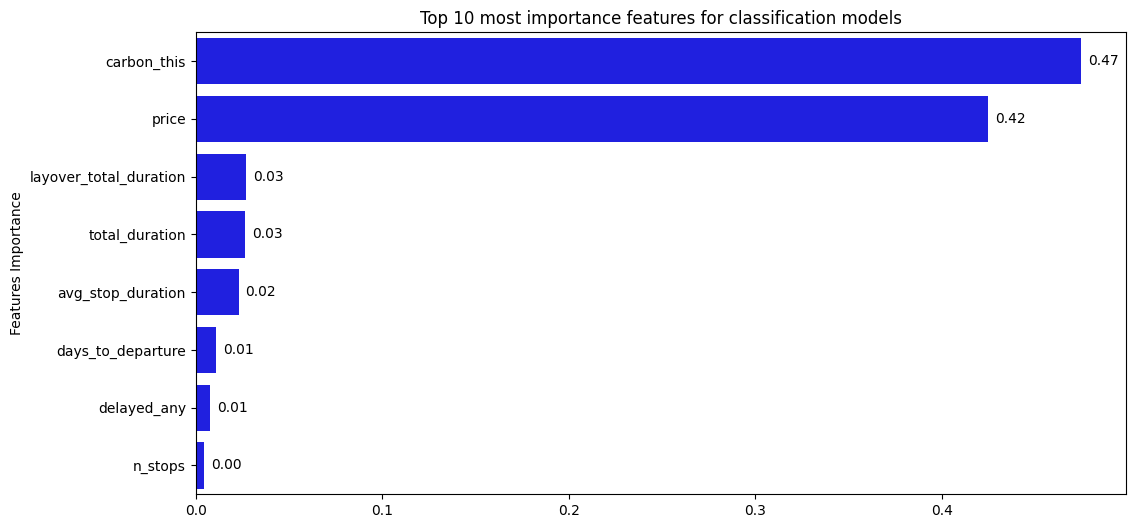

In [ ]:
# Create pipeline for feature selection
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
importances = rfe.estimator_.feature_importances_
feature_selection = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values(by="importance", ascending=False)

# Visualize the importance of selected features
plt.figure(figsize=(12,6))
ax = sns.barplot(data=feature_selection, y="feature", x ="importance", color="blue")
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, padding=5, color='black')
plt.xlabel("")
plt.ylabel("Features Importance")
plt.title("Top 10 most importance features for classification models")
plt.show()


# Exploratory Data Analysis

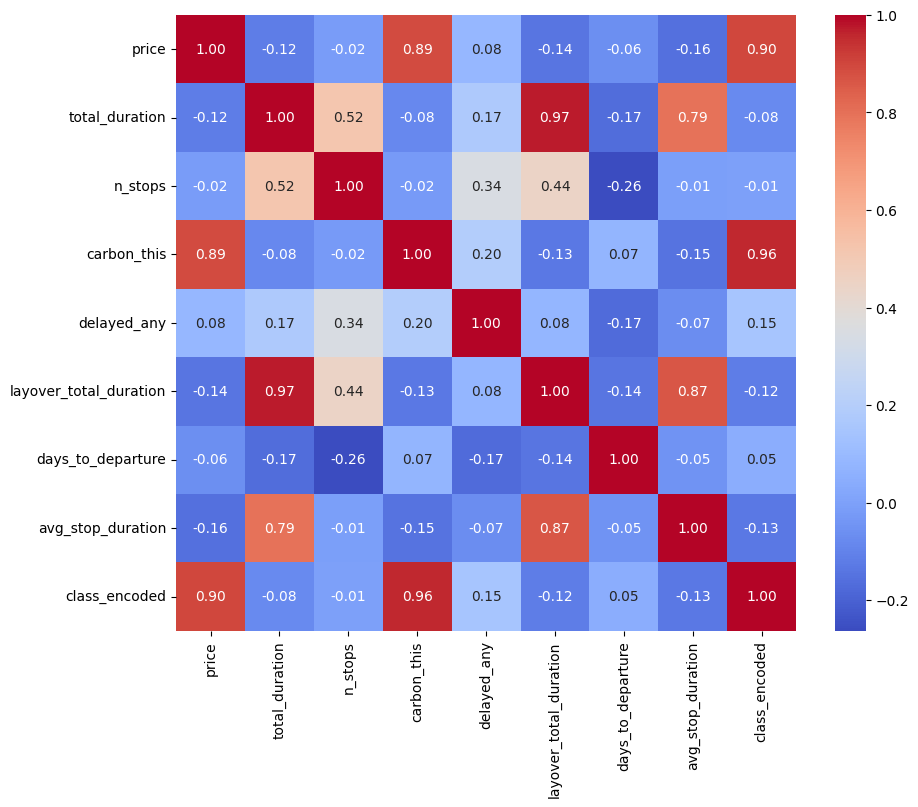

In [76]:
numeric_features = cleaned_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The number of transit connections generate a significant difference in prices of boarding passes. There are no much low cost flights so it is hard to make any insights.

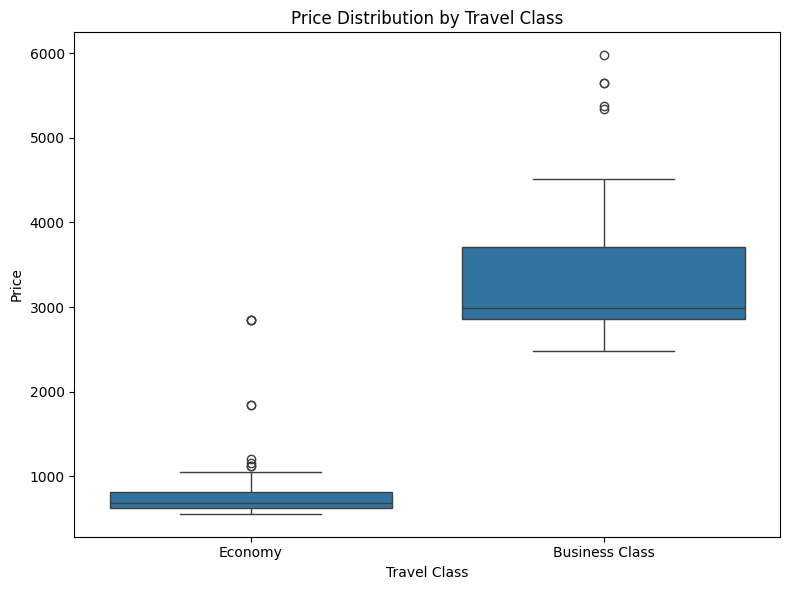

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='travel_class', y='price', data=cleaned_df)
plt.title('Price Distribution by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

C:\Users\jimmy\AppData\Local\Temp\ipykernel_148312\3140613328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')


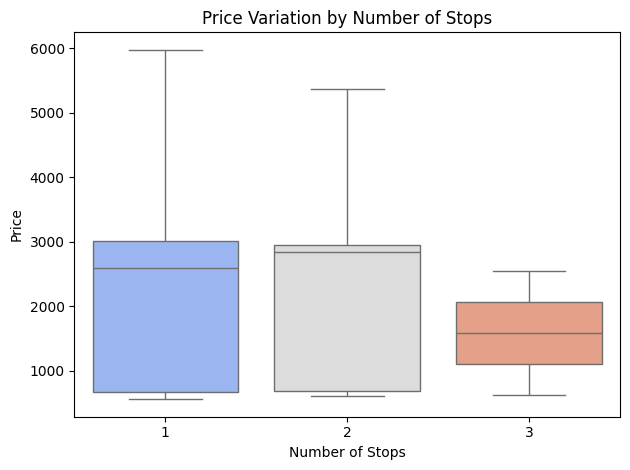

In [78]:
sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')
plt.title('Price Variation by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

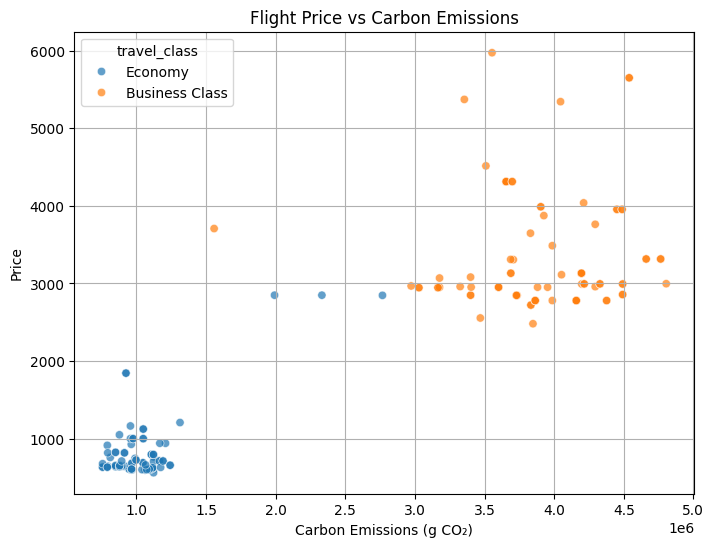

In [79]:
# Price vs. Carbon Emissions

plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='carbon_this', y='price', hue='travel_class', alpha=0.7)
plt.title("Flight Price vs Carbon Emissions")
plt.xlabel("Carbon Emissions (g CO₂)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

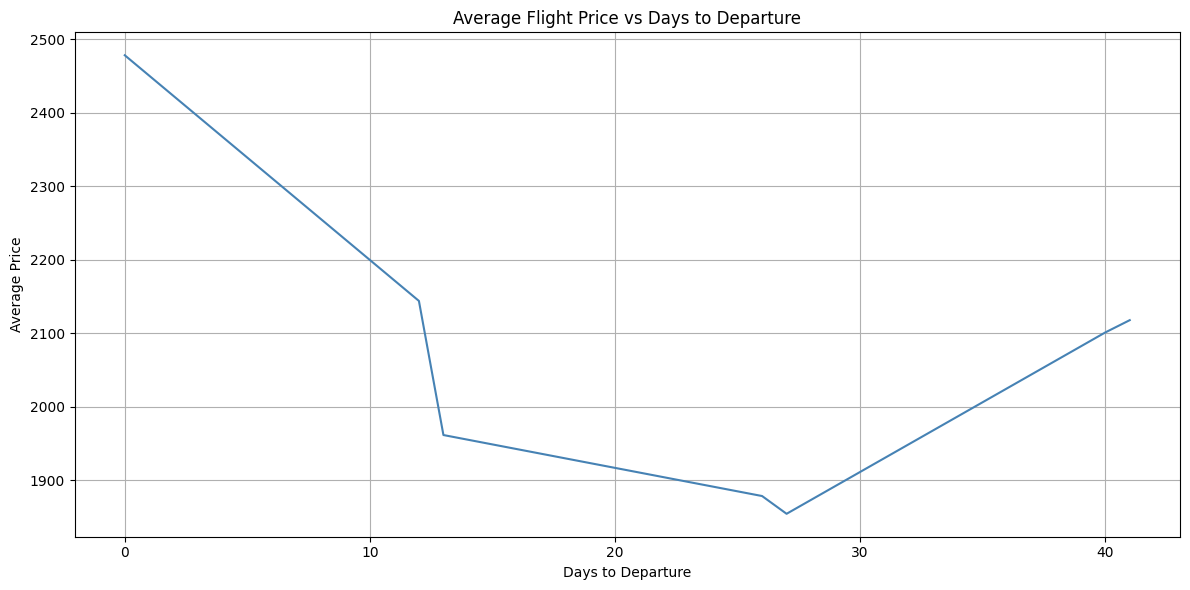

In [80]:
plt.figure(figsize=(12, 6))
avg_price = cleaned_df.groupby('days_to_departure')['price'].mean().reset_index()

sns.lineplot(data=avg_price, x='days_to_departure', y='price', color='steelblue')
plt.title("Average Flight Price vs Days to Departure")
plt.xlabel("Days to Departure")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

0.21428571428571427
0.6451612903225806
0.5


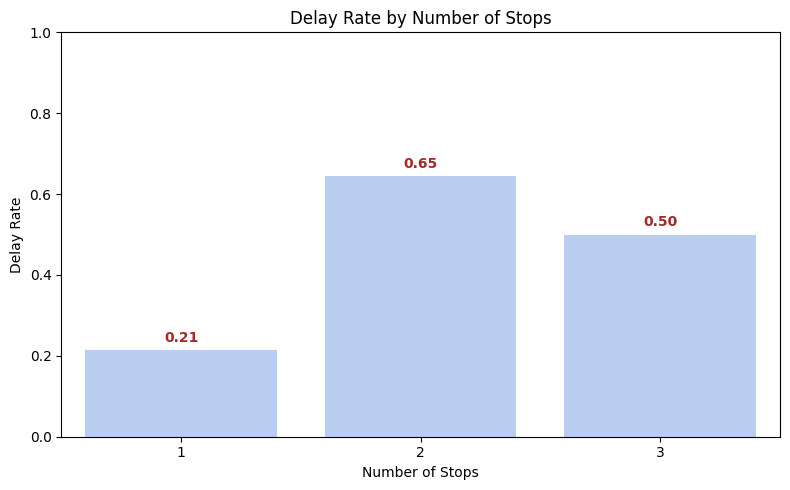

In [81]:
plt.figure(figsize=(8, 5))
delay_rates = cleaned_df.groupby('n_stops')['delayed_any'].mean().reset_index()
ax = sns.barplot(x='n_stops', y='delayed_any', data=delay_rates, color="#AECBFA")

for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x() + p.get_width() / 2., height+0.02,
            f'{height:.2f}', ha='center', fontsize=10, color="brown", fontweight="bold")


plt.title('Delay Rate by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
plt.show()

Flights with just one stop appear to have the lowest delay rate, while those with two or more stops experience significantly higher disruptions—often with over half of such itineraries affected by delays.

### How is price affected when tickets are bought from last minute to a month before departure?

In [82]:
cleaned_df["days_to_departure"].value_counts()

days_to_departure
27    28
12    27
13    25
41    24
26    24
40    23
0     22
Name: count, dtype: int64

<Axes: title={'center': 'Price Fluctuation From 10 Weeks to Last Minute Before Departure'}, xlabel='Days before departure', ylabel='Average price'>

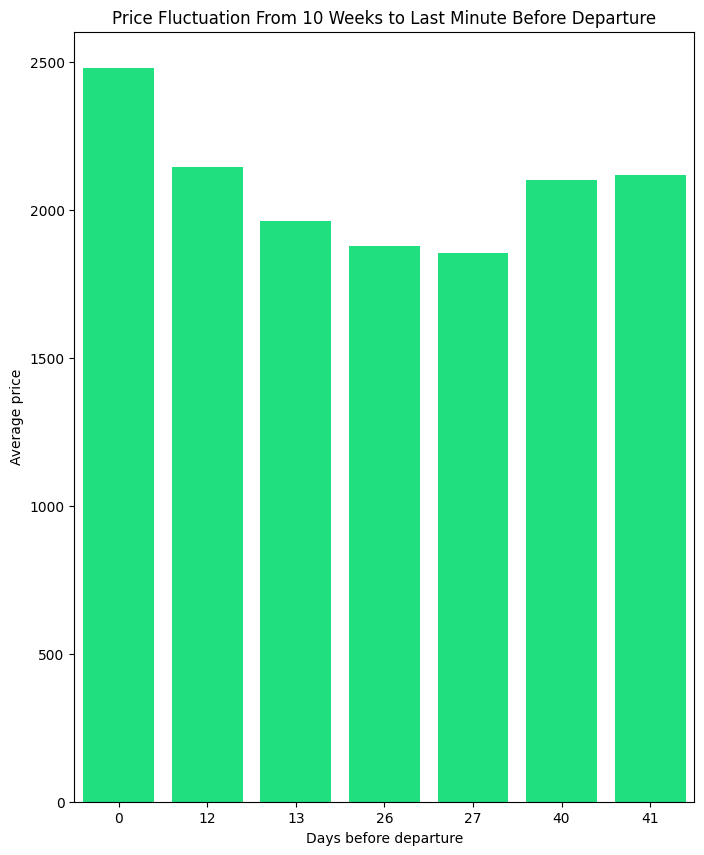

In [83]:
df = cleaned_df.sort_values(by=["days_to_departure"], axis=0, ascending=True)
df["avg_price"] = df.groupby("days_to_departure")["price"].transform("mean")

plt.figure(figsize=(8, 10))
plt.xlabel("Days before departure")
plt.ylabel("Average price")
plt.title("Price Fluctuation From 10 Weeks to Last Minute Before Departure")
sns.barplot(data=df, x="days_to_departure", y="avg_price", color="springgreen")

As can be seen, there seems to be a 'sweet spot' with much lower airfares compared to the period before or after. In this case, the price seems to be lowest 1 month before departure, which rises the closer it gets to the date.

After conducting Exploratory data analysis, we found out that the ticket price is driven by a few key factors, such as transfer flights, time before day of departure, class, etc. First of all, time before departure has a large impact on the price of the flight tickets. Generally, the closer it is, the higher the price, but there seems to be a 'sweet spot' with dramatically lower airfares compared to the period before or after it. Another big influence is of course the class of the airfare. For instance, Economy fares cluster tightly between 600 and 1,200 across everything from short to very long itineraries, with the highest outlier at nearly 3000 still cheaper than the mean of Business-class tickets, which sit between 2,500 and 6,000 regardless of trip length. Based on these insights, one should consider these factors top priority when choosing a ticket price that fits their budget.

## Logistic Regression

In [84]:
x = numeric_features.drop(columns=["class_encoded"])
y = cleaned_df['class_encoded']
x_train, x_test, y_train_log, y_test_log = train_test_split(x, y, test_size=0.5, random_state=42)

In [85]:
numeric_features.columns

Index(['price', 'total_duration', 'n_stops', 'carbon_this', 'delayed_any',
       'layover_total_duration', 'days_to_departure', 'avg_stop_duration',
       'class_encoded'],
      dtype='object')

In [86]:
model = LogisticRegression(tol = 0.001)
model.fit(x_train, y_train_log)
y_train_pred_log = model.predict(x_train)
y_test_pred_log = model.predict(x_test)

# Evaluation of training data
acc_train = metrics.accuracy_score(y_train_log, y_train_pred_log)
print(f'Train accuracy of the model is: {acc_train:.3f}')

# Evaluation of test data
acc_test = metrics.accuracy_score(y_test_log, y_test_pred_log)
print(f'Test accuracy of the model is: {acc_test:.3f}')

Train accuracy of the model is: 1.000
Test accuracy of the model is: 0.989


In [87]:
from sklearn.metrics import classification_report
print("Report for train metrics of Logistic Regression:\n", classification_report(y_train_log, y_train_pred_log))
print("Report for test metrics of Logistic Regression:\n", classification_report(y_test_log, y_test_pred_log))

Report for train metrics of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Report for test metrics of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.98      0.99        42

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



## Support Vector Machine

In [88]:
flight_model = cleaned_df[cleaned_df["class_encoded"].isin([0, 1])]

In [89]:
X = numeric_features
y = flight_model["class_encoded"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=10, train_size = 0.5)

In [91]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [92]:
# Standard Scaling
def standardize(x):
  x = pd.DataFrame(x)
  x_std = np.empty([*x.shape])
  for i in range(x.shape[1]):
    a = x.iloc[:, i].values
    x_std[:, i] = (a - np.mean(a)) / (np.std(a))
  return x_std

In [93]:
svm = SVC(kernel = 'linear')
# Convert class from 0 to -1, 1 remains the same
y_train_svm = (y_train * 2 - 1).astype(int)
y_test_svm = (y_test * 2 - 1).astype(int)

# Print result
print("Unique values in y_train_svm:", np.unique(y_train_svm))
print("Unique values in y_test_svm:", np.unique(y_test_svm))

Unique values in y_train_svm: [-1  1]
Unique values in y_test_svm: [-1  1]


In [94]:
# SVM liner model
# svm = SVC(kernel='poly', degree=2, C=1.0)
svm = SVC(kernel="linear")
svm.fit(X_train, y_train_svm)

# Coefficients and intercept
coef_svm = svm.coef_
intercept_svm = svm.intercept_

# Print result
print("beta:", coef_svm)
print("beta_0:", intercept_svm)

# Make predictions
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

# Evaluate hinge loss and accuracy score of train data
train_loss = hinge_loss(X_train, y_train_svm, coef_svm[0], intercept_svm)
train_acc = metrics.accuracy_score(y_train_svm, y_train_pred_svm)
print("\nTrain Hinge loss:", train_loss)
print("Train Accuracy of SVM:", train_acc)

# Evaluate hinge loss and accuracy score of test data
test_loss = hinge_loss(X_test, y_test_svm, coef_svm[0], intercept_svm)
test_acc = metrics.accuracy_score(y_test_svm, y_test_pred_svm)
print("\nTest Hinge loss:", test_loss)
print("Test Accuracy of SVM:", test_acc)

beta: [[ 5.70257713e-09 -3.12934811e-08  0.00000000e+00  9.70851975e-06
   0.00000000e+00 -3.04451639e-08  0.00000000e+00 -1.52225819e-08
   4.71287366e-11]]
beta_0: [-27.86338599]

Train Hinge loss: 5.1004585650600854e-08
Train Accuracy of SVM: 1.0

Test Hinge loss: 0.15790281131622094
Test Accuracy of SVM: 0.9885057471264368


In [95]:
from sklearn.metrics import classification_report
print("Report for train accuracy of SVM:\n", classification_report(y_train_svm, y_train_pred_svm))
print("Report for test accuracy of Logistic Regression:\n", classification_report(y_test_svm, y_test_pred_svm))

Report for train accuracy of SVM:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        41

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Report for test accuracy of Logistic Regression:
               precision    recall  f1-score   support

          -1       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        44

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



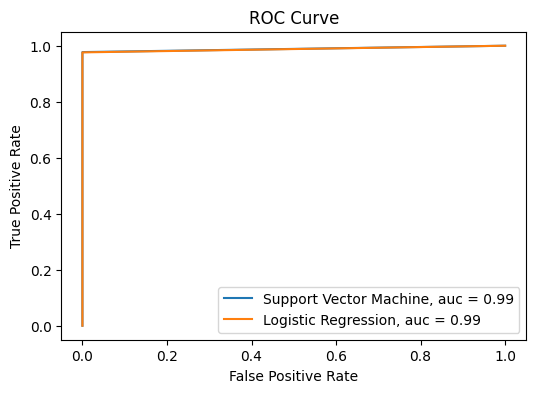

In [96]:
plt.figure(figsize=(6, 4))

# False positive rate and true positive rate
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test_svm, y_test_pred_svm)
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test_log, y_test_pred_log)

# Area under ROC line
auc_svm = metrics.roc_auc_score(y_test_svm, y_test_pred_svm)
auc_log = metrics.roc_auc_score(y_test_log, y_test_pred_log)

# Display
plt.plot(fpr_svm, tpr_svm, label=f"Support Vector Machine, auc = {auc_svm:.2f}")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression, auc = {auc_log:.2f}")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=0)
plt.show()

## K-Means Clustering

In [97]:
def standardization(data):
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

def inverse_scale(x, max_cols, min_cols):
    """Return standardized matrix to original value range
    Params:
        x (float): cluster center value
        max_cols (np.array): max value of each column
        min_cols (np.array): min value of each column
    
    """
    return np.array(x * (max_cols - min_cols) + min_cols)


In [98]:
from sklearn.cluster import KMeans

# Standardize data
df = standardization(numeric_features)

## Elbow Method
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

In [99]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=0.01, random_state=42)
    kmeans.fit_transform(df)
    inertias.append(kmeans.inertia_)

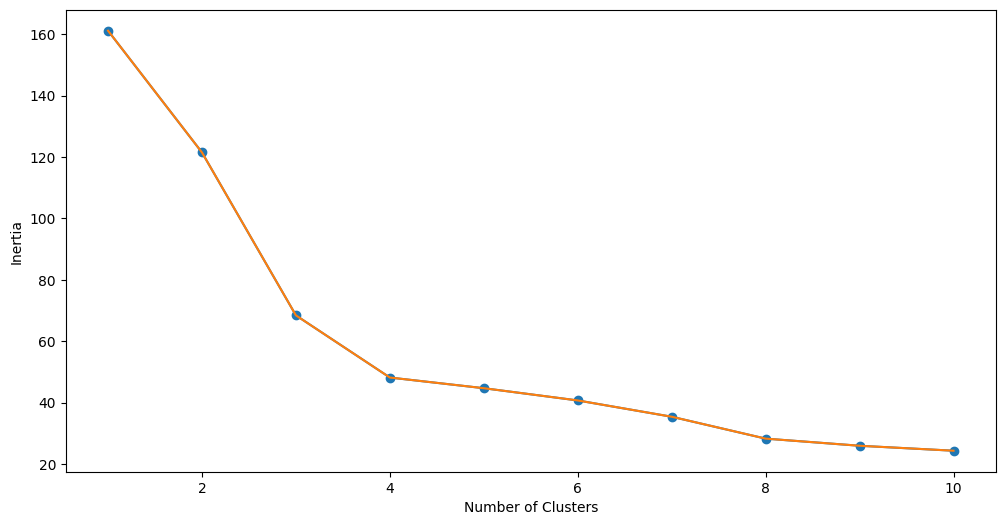

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertias, marker='o')
plt.plot(np.arange(1, 11), inertias, alpha=1)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## K-means with Cluster = 4

In [101]:
chosen_cluster = 4
ml = KMeans(n_clusters=chosen_cluster, max_iter=300, tol=0.01, random_state=42)
ml.fit_transform(df)

# Label of each observations
y_kmeans = ml.predict(df)
df['cluster'] = pd.DataFrame(y_kmeans)

In [102]:
df

,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration,class_encoded,cluster
0,0.006833,0.089959,0.0,0.083251,0.0,0.020208,0.658537,0.029536,0.0,1
1,0.007941,0.084156,0.0,0.090415,0.0,0.106813,0.658537,0.156118,0.0,1
2,0.015882,0.046431,0.0,0.032362,0.0,0.089492,0.658537,0.130802,0.0,1
3,0.006833,0.145096,0.0,0.051630,0.0,0.075058,0.658537,0.109705,0.0,1
4,0.008680,0.206616,0.5,0.047184,1.0,0.197460,0.658537,0.106329,0.0,0
...,...,...,...,...,...,...,...,...,...,...
168,0.444691,0.120139,0.5,0.547431,1.0,0.092379,0.317073,0.029536,1.0,2
169,0.471468,0.295995,0.0,0.814229,0.0,0.326212,0.317073,0.476793,1.0,3
170,0.627147,0.014510,0.0,0.921690,0.0,0.060624,0.317073,0.088608,1.0,3
171,0.633241,0.000000,0.0,0.777421,0.0,0.000000,0.317073,0.000000,1.0,3


In [103]:
print("Number of iterations have run:", ml.n_iter_)

# Cluster centers
result = pd.DataFrame(ml.cluster_centers_, columns=numeric_features.columns).T
print(f"\nCenter values of {chosen_cluster} clusters:")
result

Number of iterations have run: 4

Center values of 4 clusters:


,0,1,2,3
price,7.449845e-02,4.171633e-02,0.464016,5.445812e-01
total_duration,3.296840e-01,1.459400e-01,0.203209,1.398401e-01
n_stops,3.181818e-01,3.030303e-02,0.177419,5.555556e-02
carbon_this,1.106832e-01,5.675455e-02,0.797024,7.626125e-01
delayed_any,9.090909e-01,0.000000e+00,1.000000,2.775558e-16
layover_total_duration,2.980789e-01,1.610505e-01,0.172409,1.416474e-01
days_to_departure,3.048780e-01,6.171471e-01,0.561762,5.754291e-01
avg_stop_duration,2.415548e-01,2.229894e-01,0.155365,1.800516e-01
class_encoded,-1.110223e-16,-4.996004e-16,1.000000,1.000000e+00


In [104]:
np.array(numeric_features.max(axis=0))

array([5.974e+03, 2.958e+03, 3.000e+00, 4.805e+06, 1.000e+00, 1.822e+03,
       4.100e+01, 1.275e+03, 1.000e+00])

In [105]:
np.array(numeric_features.max(axis=0)).reshape(-1, 1)

array([[5.974e+03],
       [2.958e+03],
       [3.000e+00],
       [4.805e+06],
       [1.000e+00],
       [1.822e+03],
       [4.100e+01],
       [1.275e+03],
       [1.000e+00]])

## Turn standardized centers to original range value

In [106]:
inverse_center = inverse_scale(np.array(result), np.array(numeric_features.max(axis=0)).reshape(-1, 1), np.array(numeric_features.min(axis=0)).reshape(-1, 1))

# Rescale value of 4 cluster centers
pd.DataFrame(inverse_center, index=numeric_features.columns)

,0,1,2,3
price,9.624091e+02,7.848939e+02,3.071645e+03,3.507907e+03
total_duration,1.803045e+03,1.486455e+03,1.585129e+03,1.475944e+03
n_stops,1.636364e+00,1.060606e+00,1.354839e+00,1.111111e+00
carbon_this,1.205045e+06,9.867424e+05,3.983355e+06,3.844056e+06
delayed_any,9.090909e-01,0.000000e+00,1.000000e+00,2.775558e-16
layover_total_duration,6.062727e+02,3.689394e+02,3.886129e+02,3.353333e+02
days_to_departure,1.250000e+01,2.530303e+01,2.303226e+01,2.359259e+01
avg_stop_duration,3.762424e+02,3.542424e+02,2.741075e+02,3.033611e+02
class_encoded,-1.110223e-16,-4.996004e-16,1.000000e+00,1.000000e+00


## Decision Tree Regressor

In [107]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = numeric_features[["total_duration", "n_stops", "days_to_departure", "layover_total_duration", "class_encoded"]]
y = numeric_features["price"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.5)
# Fit model
dtree = DecisionTreeRegressor(min_samples_split=6)
dtree.fit(X_train, y_train)
# Predict on test values
predict = dtree.predict(X_test)

predict

array([ 621.        , 2987.8       ,  670.        ,  804.6       ,
       2848.        ,  861.4       , 3081.        , 1060.        ,
       2846.        , 2750.        ,  621.        ,  670.        ,
        670.        , 2846.        , 2750.        ,  585.66666667,
       2750.        ,  804.6       ,  585.66666667, 3146.6       ,
        808.        , 2846.        ,  861.4       , 3361.66666667,
        804.6       , 4982.2       ,  861.4       ,  585.66666667,
        640.        ,  621.        , 2750.        ,  585.66666667,
        640.        ,  621.        , 3361.66666667, 3146.6       ,
        621.        , 3146.6       , 4311.5       ,  621.        ,
       4982.2       , 4311.5       ,  640.        , 2987.8       ,
       2948.2       , 3146.6       , 2750.        ,  670.        ,
       2750.        , 3146.6       ,  621.        , 2750.        ,
       4982.2       , 3954.33333333,  861.4       ,  640.        ,
        621.        , 1060.        , 4982.2       , 2750.     

In [108]:
# Root mean squared error of model
print(np.sqrt(metrics.mean_squared_error(y_test, predict)))

632.33604378788


In [109]:
# R^2 score on test data
r_square = metrics.r2_score(y_test, predict)
r_square

0.7505169694952365

In [110]:
numeric_features["price"].unique()

array([ 596,  602,  645,  606,  623,  631,  638,  644,  651,  711,  794,
        998,  559,  610,  594, 2720, 2778, 2856, 3130, 2944, 2950, 2992,
       3953, 4311, 2480, 2721, 2779, 2848, 2846, 2945, 3132, 3955, 4313,
        744,  756,  912,  925,  939, 1048, 1162, 1206, 3707, 2554, 2954,
       2958, 2959, 3874, 4038, 4515, 5343, 5372, 5974,  763,  682,  687,
        816,  822, 1122,  680,  705,  710,  599,  622,  675,  815, 3081,
       3314, 2951, 3306, 5649, 2952, 2994, 3315, 5651,  628,  656,  723,
       1844,  660, 1843, 2996, 3486, 3069, 3309, 3647, 3762, 3987, 2967,
       3112, 3988])

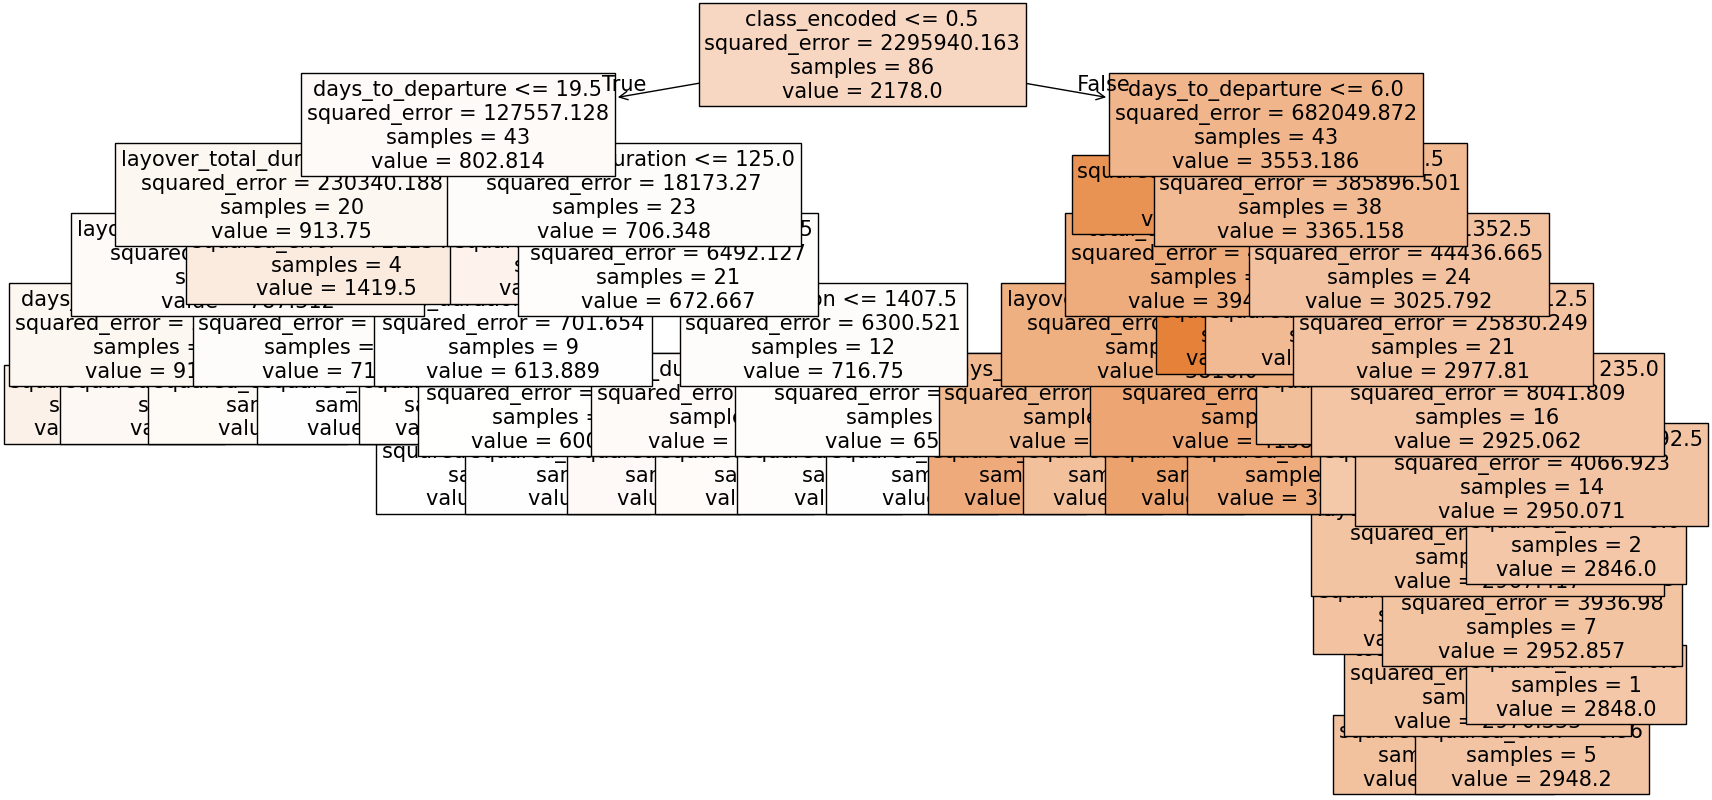

In [111]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=["total_duration", "n_stops", "days_to_departure", "layover_total_duration", "class_encoded"], impurity=True, filled=True, fontsize=15)
plt.show()

In [112]:
flight_df

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_stops,carbon_this,delayed_any,layover_total_duration,days_to_departure,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,1,1094000,0,125,27,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,1,1123000,0,275,27,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,1,888000,0,245,27,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,1,966000,0,220,27,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,2,948000,1,432,27,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CI 794,2967,1442,2,2973000,1,250,13,125.0
169,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CX 742,3112,1745,1,4053000,0,655,13,655.0
170,2025-05-14 16:45:32,2025-05-28,One way,Business Class,BR 398,3955,1260,1,4488000,0,195,13,195.0
171,2025-05-14 16:45:32,2025-05-28,One way,Business Class,OZ 730,3988,1235,1,3904000,0,90,13,90.0


In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': range(1, 50)}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'min_samples_split': 16}


c:\Users\jimmy\Documents\Tài liệu\vital docs\CODING\Python\dias\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\Tài liệu\vital docs\CODING\Python\dias\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\Tài liệu\vital docs\CODING\Python\dias\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\Tài liệu\vital docs\CODING\Py